IMAM PRAYOGA (1301190346)

DITA JULAIKA PUTRI (1301194244)

In [ ]:
pip install niapy --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import package
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from scipy import stats
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.modified import HybridBatAlgorithm
from time import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Formulasi Masalah
Diberikannya data nilai dari perumahan di pinggiran kota Boston, Pada permasalahan yang ada di dataset ini, kita akan membuat suatu model yang bisa melakukan proses hyperparameter tuning otomatis dengan suatu nature inspired algorithm dengan menggunakan metode prediksi Support Vector Regression, XGBoost dan Multi Layer Perceptron. <br>
Deskripsi data: <br>
crim: tingkat kejahatan per kapita menurut kota. \
zn: proporsi tanah perumahan dikategorikan untuk banyak lebih dari 25.000 sq.ft.\
indus: proporsi hektar bisnis non-ritel per kota. \
chas: Variabel dummy Sungai Charles (1: jika saluran membatasi sungai; 0: sebaliknya). \
nox: konsentrasi nitrogen oksida (bagian per 10 juta). \
rm: rata-rata jumlah kamar per hunian. \
age: proporsi unit yang ditempati oleh pemilik yang dibangun sebelum tahun 1940. \
dis: rata-rata tertimbang jarak ke lima pusat kerja Boston. \
rad: indeks aksesibilitas jalan raya radial. \
tax: tarif pajak properti nilai penuh per \$10.000. \
ptratio: rasio murid-guru menurut kota. \
black: 1000(Bk - 0,63)^2 di mana Bk adalah proporsi orang kulit hitam menurut kota. \
lstat: status penduduk yang lebih rendah (persen). \
medv: nilai median rumah yang ditempati pemilik dalam \$1000-an.

### Data Set

In [ ]:
# read dataset train
df_train = pd.read_csv('boston_train.csv')

In [ ]:
# read dataset test
df_test = pd.read_csv('boston_test.csv')

### Eksploratori dan Persiapan Data

In [ ]:
# informasi seputar data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  PRICE    404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 44.3 KB


In [ ]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.423852,10.818069,11.168911,0.071782,0.556195,6.278074,68.979455,3.724405,9.551980,407.712871,18.458911,353.866139,12.768267,22.409901
std,8.197229,23.061649,6.798110,0.258447,0.116187,0.691061,27.692028,1.983793,8.741662,169.344926,2.152993,95.592190,7.170852,8.940920
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,6.300000
25%,0.082598,0.000000,5.190000,0.000000,0.453000,5.888000,45.800000,2.110500,4.000000,278.500000,17.400000,374.527500,7.135000,17.175000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.198500,77.150000,3.207450,5.000000,330.000000,19.000000,391.880000,11.675000,20.950000
75%,3.694070,3.125000,18.100000,0.000000,0.624000,6.616500,93.900000,5.104475,24.000000,666.000000,20.200000,396.285000,16.605000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


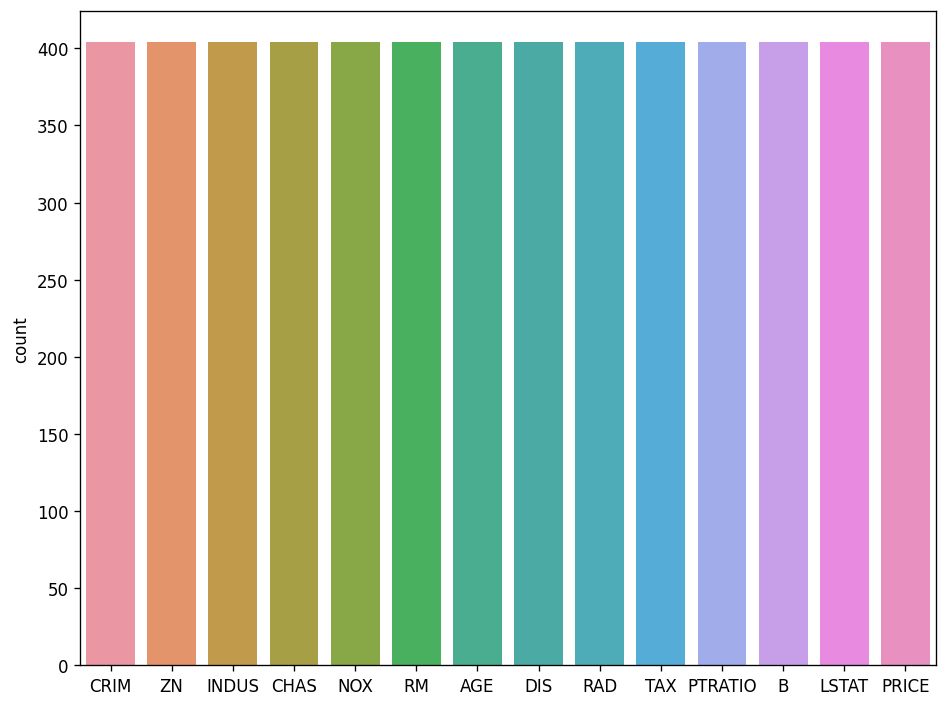

In [ ]:
# visualisasi perbandingan data
plt.figure(figsize=(8,6))
sns.countplot(data=df_train)
plt.tight_layout()

#### Check Missing Values and Duplicated Data

In [ ]:
# check NaN df_train
df_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
# check duplicated value
df_train[df_train.duplicated(keep=False)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


#### Outliers

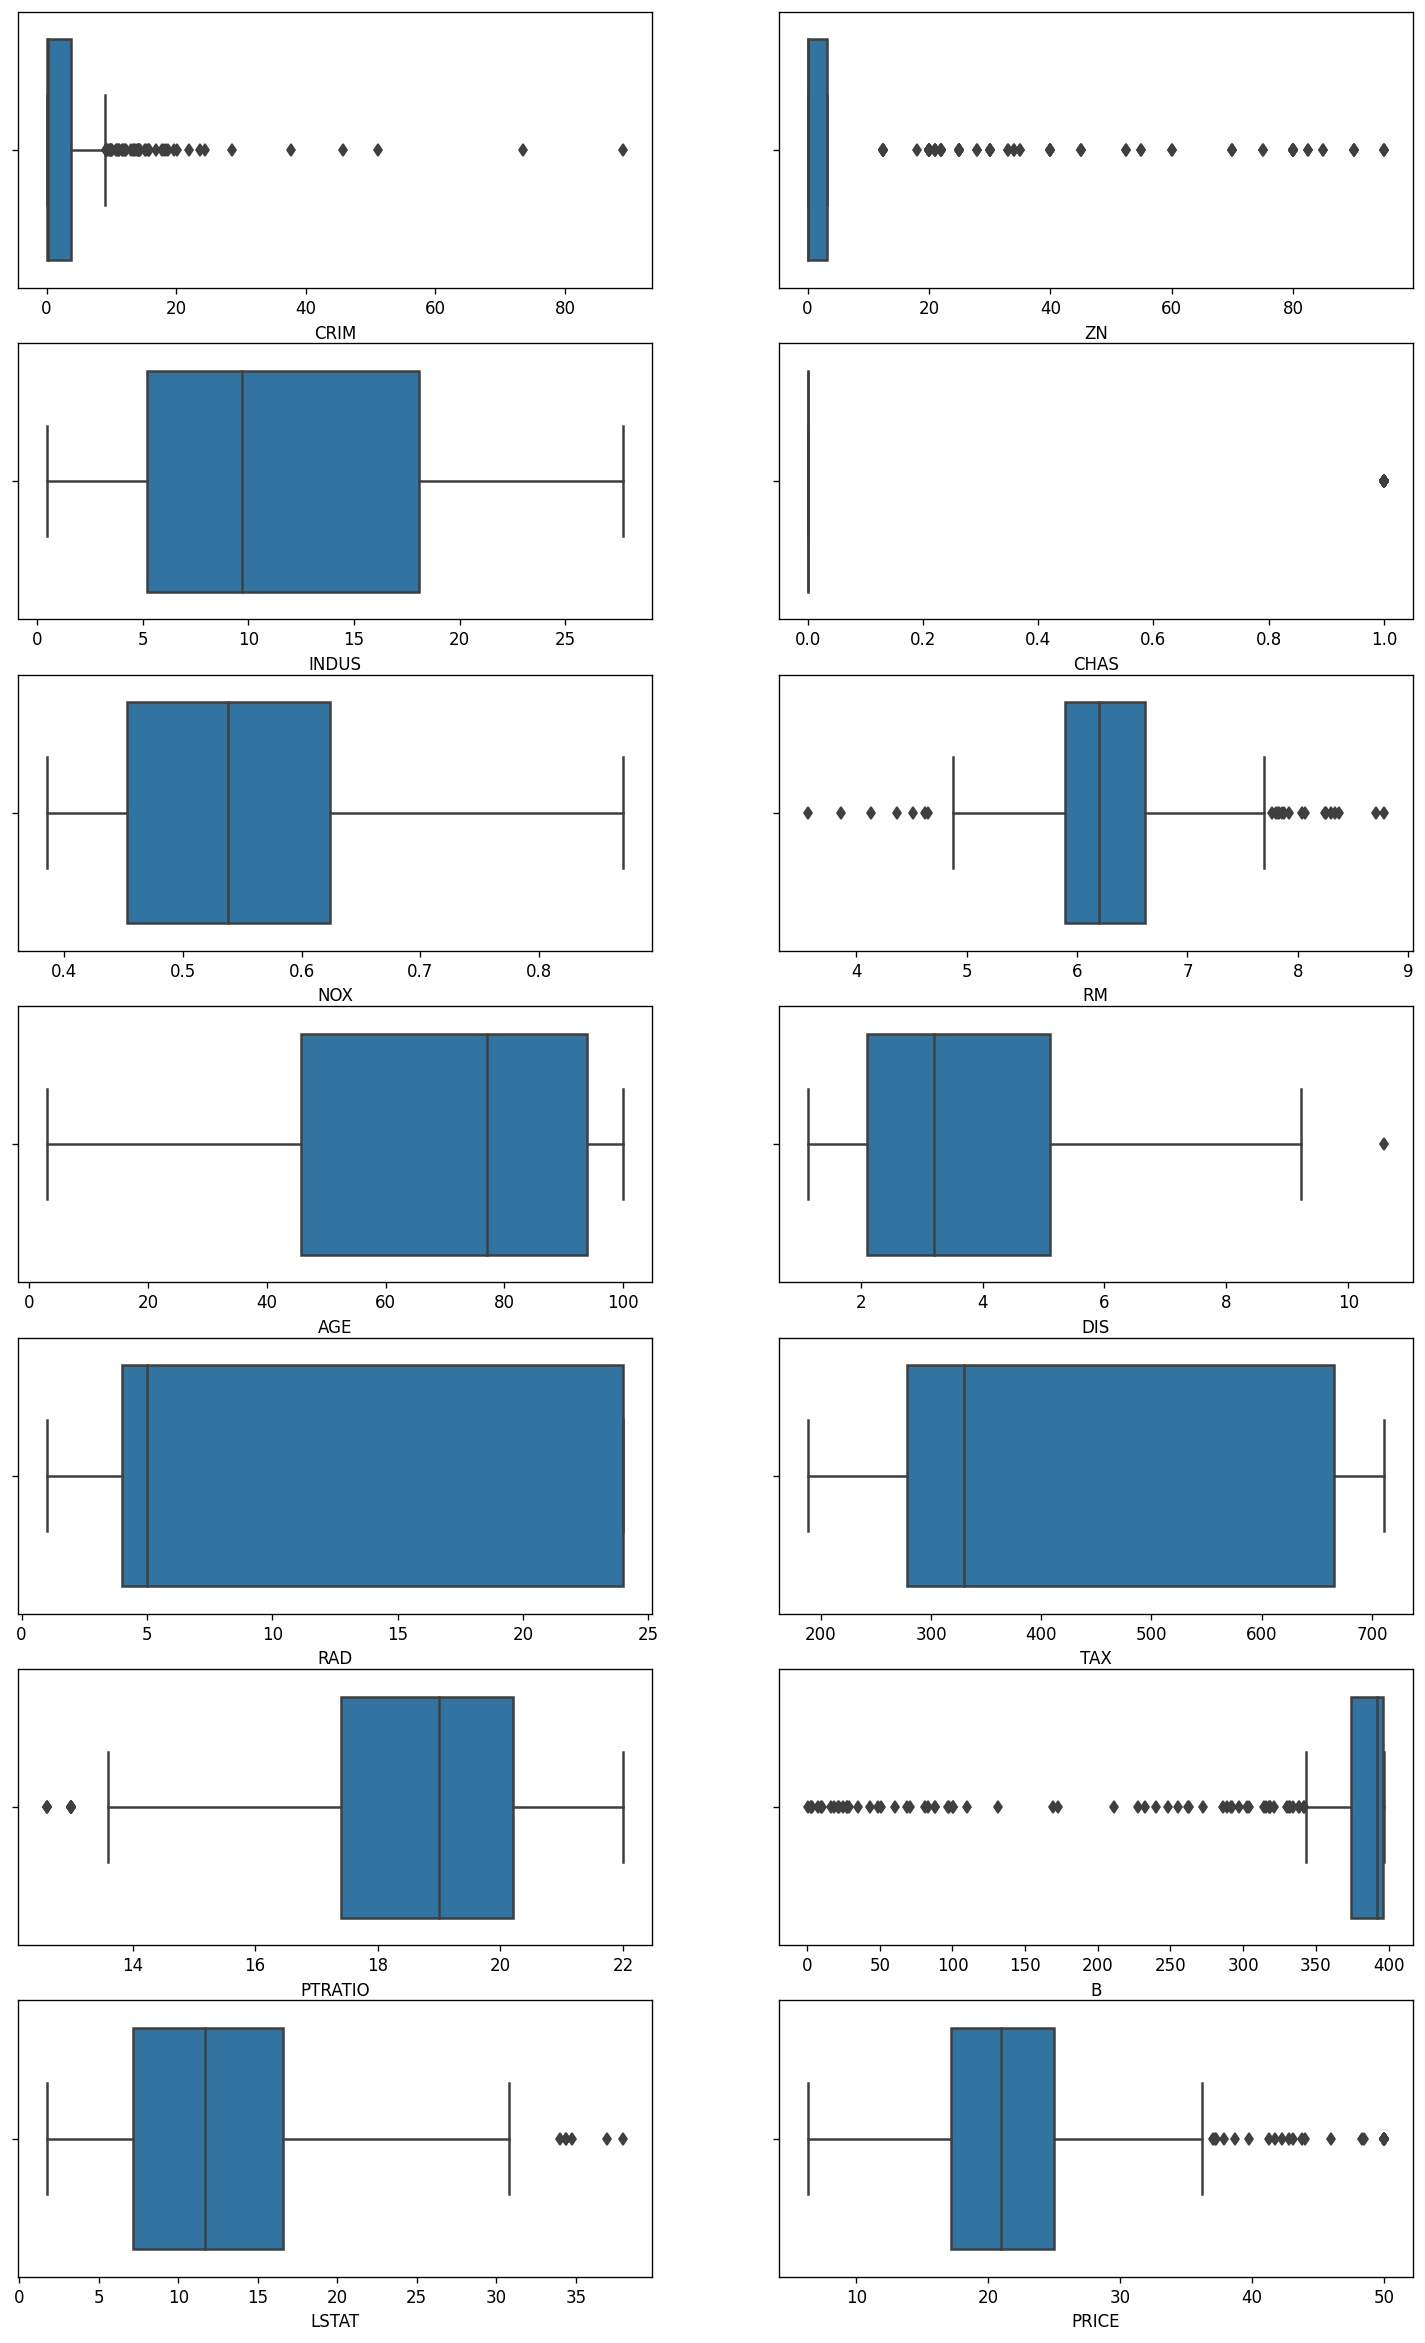

In [ ]:
# mencari outlier dengan boxplot
fig, axes = plt.subplots(7, 2, figsize=(15, 25))
sns.boxplot(df_train["CRIM"], ax=axes[0, 0])
sns.boxplot(df_train["ZN"], ax=axes[0, 1])
sns.boxplot(df_train["INDUS"], ax=axes[1, 0])
sns.boxplot(df_train["CHAS"], ax=axes[1, 1])
sns.boxplot(df_train["NOX"], ax=axes[2, 0])
sns.boxplot(df_train["RM"], ax=axes[2, 1])
sns.boxplot(df_train["AGE"], ax=axes[3, 0])
sns.boxplot(df_train["DIS"], ax=axes[3, 1])
sns.boxplot(df_train["RAD"], ax=axes[4, 0])
sns.boxplot(df_train["TAX"], ax=axes[4, 1])
sns.boxplot(df_train["PTRATIO"], ax=axes[5, 0])
sns.boxplot(df_train["B"], ax=axes[5, 1])
sns.boxplot(df_train["LSTAT"], ax=axes[6, 0])
sns.boxplot(df_train["PRICE"], ax=axes[6, 1])
plt.show()

more_than:  0      False
1      False
2      False
3      False
4      False
       ...  
399    False
400    False
401    False
402    False
403    False
Name: B, Length: 404, dtype: bool  | less_than:  0      False
1      False
2       True
3      False
4      False
       ...  
399    False
400    False
401    False
402    False
403    False
Name: B, Length: 404, dtype: bool


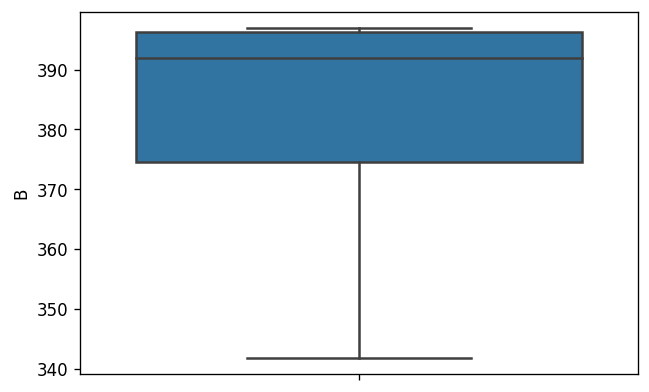

In [ ]:
# handling outlier data B

# menghitung jarak interquartile
def interquartile(df_train,x):
  q1 = (df_train[x]).quantile(0.25)
  q3 = (df_train[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

# menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(df_train,x,maximum,minimum):
  more_than = (df_train[x] > maximum)
  less_than = (df_train[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df_train[x] = df_train[x].mask(more_than, maximum,axis=0)
  df_train[x] = df_train[x].mask(less_than, minimum,axis=0)
  return df_train

maximum,minimum = interquartile(df_train,'B')
df_train = sub_outliners(df_train,'B',maximum,minimum)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_train["B"])
plt.subplots_adjust(wspace=10)

more_than:  0      False
1      False
2      False
3      False
4      False
       ...  
97     False
98     False
99     False
100    False
101    False
Name: B, Length: 102, dtype: bool  | less_than:  0      False
1      False
2      False
3      False
4       True
       ...  
97     False
98     False
99     False
100    False
101    False
Name: B, Length: 102, dtype: bool


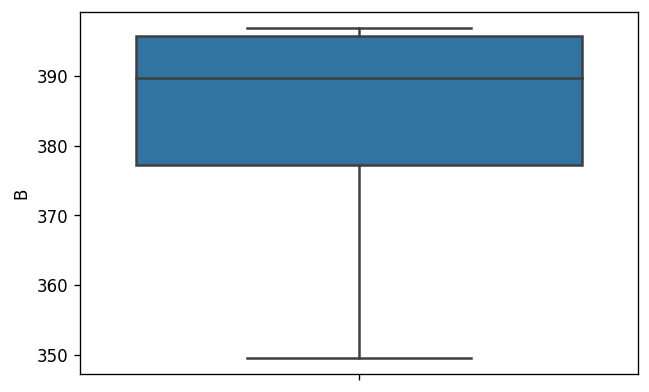

In [ ]:
# handling outlier data B

# menghitung jarak interquartile
def interquartile(df_test,x):
  q1 = (df_test[x]).quantile(0.25)
  q3 = (df_test[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

# menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(df_test,x,maximum,minimum):
  more_than = (df_test[x] > maximum)
  less_than = (df_test[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  df_test[x] = df_test[x].mask(more_than, maximum,axis=0)
  df_test[x] = df_test[x].mask(less_than, minimum,axis=0)
  return df_test

maximum,minimum = interquartile(df_test,'B')
df_test = sub_outliners(df_test,'B',maximum,minimum)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_test["B"])
plt.subplots_adjust(wspace=10)

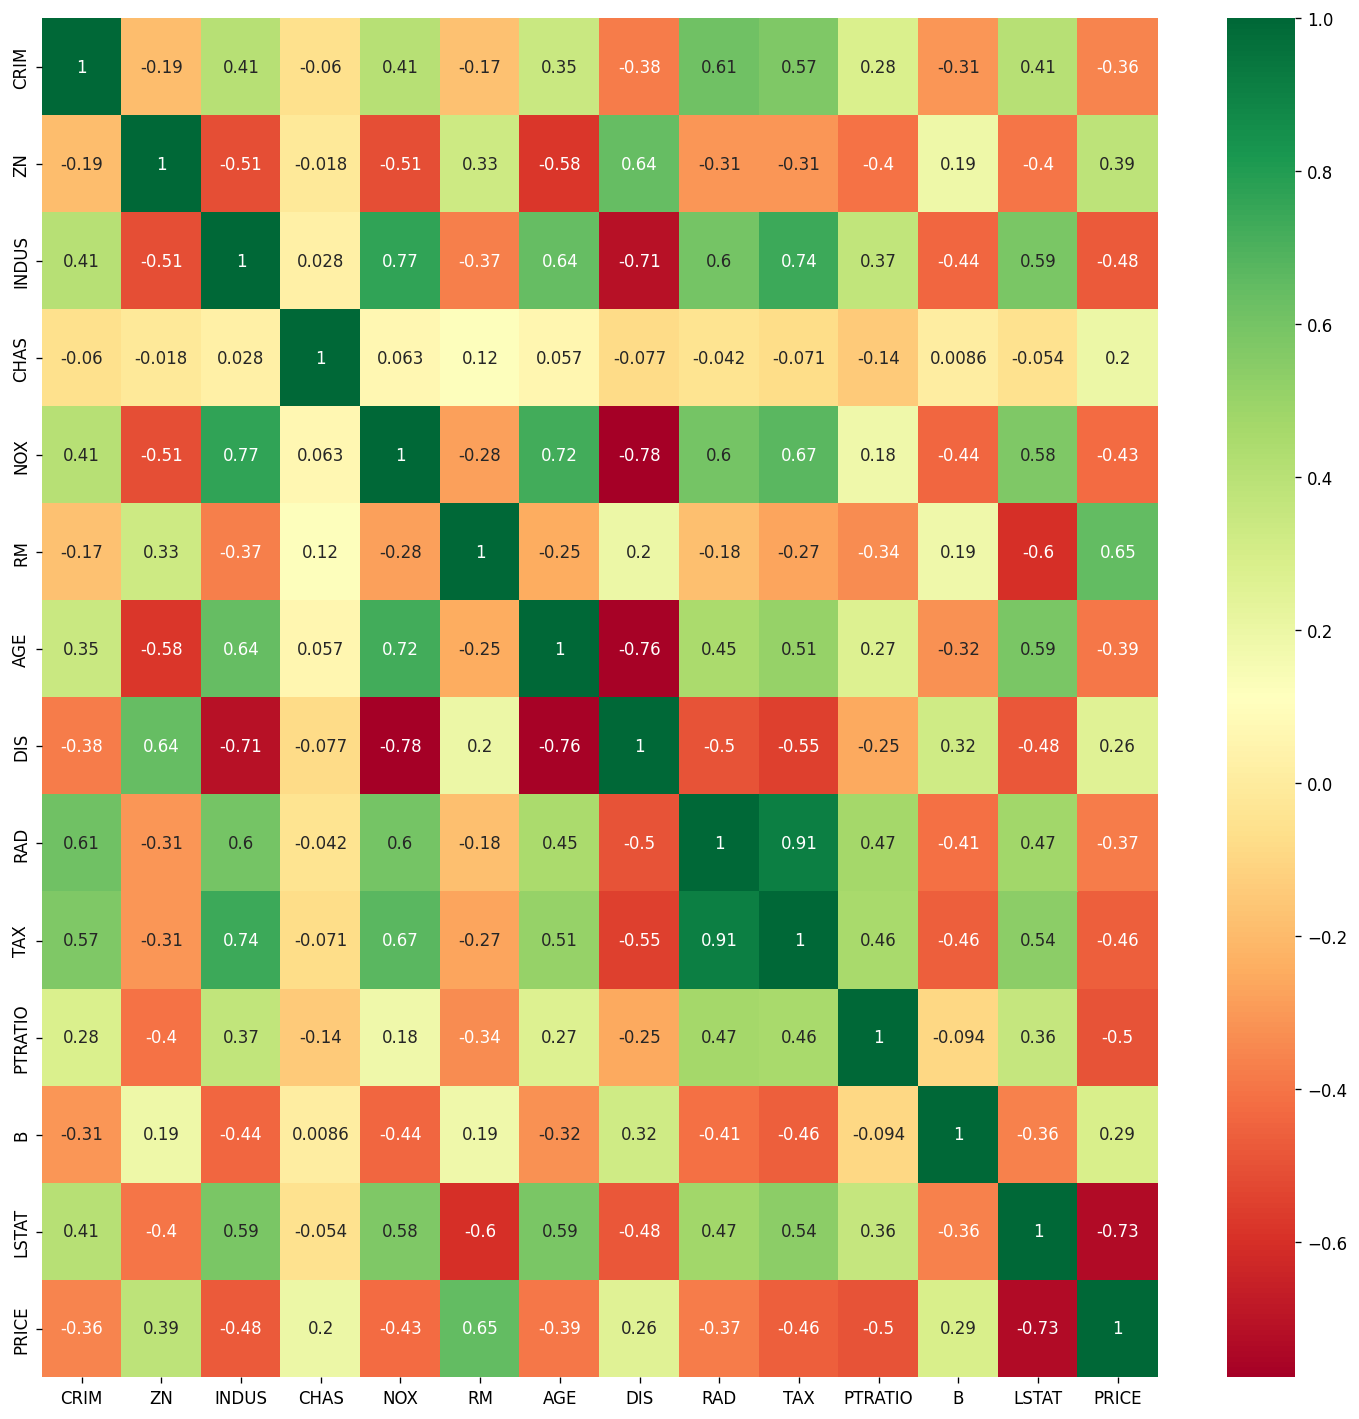

In [ ]:
# melihat korelasi antar variabel dengan heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

korelasi terbesar: \
- RAD dan TAX : 0.91 \
- NOX dan INDUS : 0.77 \
- AGE dan NOX : 0.72 \
<br>
korelasi terkecil: \
- DIS dan NOX : -0.78 \
- DIS dan AGE : -0.76 \
- PRICE dan LSTAT : -0.73

### Splitting X dan Y

In [ ]:
# memasukan data train keseluruhan selain label pada variabel x
x_train = df_train.drop('PRICE', axis=1)
# memasukan data value label train kedalam variabel y yang berbentuk array
y_train = df_train['PRICE']

In [ ]:
# memasukan data train keseluruhan selain label pada variabel x
x_test = df_test.drop('PRICE', axis=1)
# memasukan data value label test kedalam variabel y yang berbentuk array
y_test = df_test['PRICE']

### Hypertuning parameter

In [ ]:
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization
from sklearn.svm import SVR

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#Mean Absolute Percentage Error (MAPE)

In [ ]:
class SVMHyperparameterOptimization(Problem):
    def __init__(self,lower, upper, x_train,y_train,x_test,y_test):
        super().__init__(dimension=3, lower=lower, upper=upper)
        self.X_tr, self.y_tr, self.X_val, self.y_val = x_train,y_train,x_test,y_test
    def _evaluate(self,x):
        model = SVR(C=x[0], epsilon=x[1], gamma=x[2])
        model.fit(self.X_tr, self.y_tr)
        result = model.predict(self.X_val)
        mape = MAPE(self.y_val, result)
        return mape

In [ ]:
# lower and upper can be tuples, lists, numpy arrays or scalars. If they're scalars, each parameter will have the same bound.
lower = (0.01, 0.0001, 0.0001)
upper = (32000.0, 32.0, 1.0)

problem = SVMHyperparameterOptimization(lower,upper,x_train,y_train,x_test,y_test)

task = Task(problem=problem, max_iters=100)

# Initialize the PSO algorithm
pso = ParticleSwarmOptimization(population_size=10, c1=2.0, c2=2.0)

# Run the algorithm on task
best_params, best_mape = pso.run(task)
C, gamma, epsilon = best_params
print('Best parameters: C={}; gamma={}; epsilon={}'.format(C, gamma, epsilon))
print('Best score:', best_mape)

Best parameters: C=991.7888705299492; gamma=0.0001; epsilon=0.0001
Best score: 14.66089555956111


### Regressor using SVR (Support Vector Regression)

In [ ]:
svr = SVR(C=983.8068130057317, gamma=0.0001, epsilon=0.0001)

In [ ]:
svr.get_params()

{'C': 983.8068130057317,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.0001,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svr.fit(x_train,y_train)

SVR(C=983.8068130057317, epsilon=0.0001, gamma=0.0001)

In [ ]:
training_data_prediction = svr.predict(x_train)

In [ ]:
print(training_data_prediction)

[21.70017854 15.00011639 15.4830764  35.97838086 15.57566885  9.6903208
 26.25724071 18.31293942 11.04982197 31.00447697 19.6106455  16.50001338
 14.02555041 23.11221104 34.89968938 23.31296686 14.39966217 31.30215139
 19.65520452 18.64714093 16.55948436 35.40015504 20.23465288 31.30980534
 23.83474668 20.89987096 18.30002665 24.29957219 19.81024393 22.3002063
 10.89981342  8.32441313 20.5249919   9.11536463 15.6000741  33.40039222
 13.90173743 32.16180109 20.40009801 14.73181317 28.46059254 20.09994836
 24.79952503 28.99993822 24.82649794 21.97376263 23.2002971   8.86452799
 20.53624422 21.60564717 29.04335964 18.60039008  9.67069537 30.69992249
 24.89246962 22.40008746 12.31932668 13.26794503 15.598833   30.56669471
 18.90003325 16.60914361 16.32015724 22.01421748 25.48585207 22.71090889
 24.38414524 18.50063144 28.99999356 22.56683223 21.48045505 13.05936207
 24.32683772 11.23037634  8.80012689 23.69986289 21.10002144 21.20020976
 21.6992354  21.79997212 20.89963676 30.95660344 24.9

### Evaluation

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8560499185462942
Mean Absolute Error :  1.7040557666125258


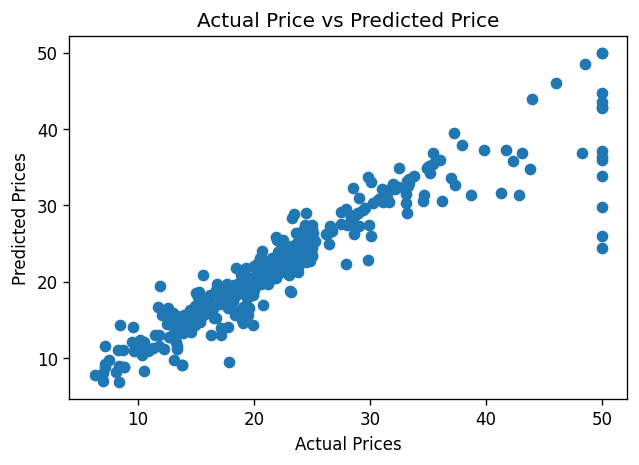

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

### Implementation to data test

In [ ]:
# accuracy for prediction on test data
test_data_prediction = svr.predict(x_test)

In [ ]:
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)


R squared error :  0.7675255461842805
Mean Absolute Error :  3.1503938282307686


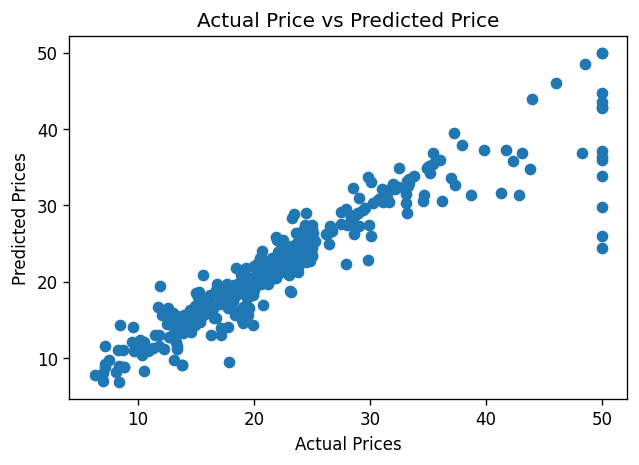

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
import xgboost as xgb

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
model = XGBRegressor()

In [ ]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
model.fit(x_train,y_train)

[11:13:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
training_data_prediction = model.predict(x_train)

In [ ]:
print(training_data_prediction)

[19.29956   16.959421  14.790545  50.11121   12.219778  11.273395
 25.330635  19.31275    8.760564  28.889078  18.540167  18.909966
 15.616765  21.631113  34.273716  23.142878  13.607063  38.798866
 20.900732  17.71645   18.03485   34.90812   20.165045  42.595955
 24.694231  21.032125  18.204563  22.70603   19.943544  21.634361
 11.964561  10.120484  19.87793   13.262758  15.465454  33.70952
 15.611058  30.53492   18.60244   14.182977  27.995758  19.388191
 25.853655  27.003113  23.023718  24.072617  23.934572   8.666241
 20.165045  21.119312  31.926048  19.444542   9.400833  29.907108
 24.940996  21.642399  14.871173  15.2670555 14.014692  32.69715
 17.301888  15.418565  19.28681   21.243637  23.382605  22.412441
 24.04516   18.988344  31.190039  22.057608  20.595112  15.1483
 25.065536  10.490915   8.407703  21.339039  20.875593  20.74707
 20.950651  20.84115   21.076937  32.205776  23.856892  17.832651
 30.125053  18.956568  15.556227  25.778183  14.808709  20.689095
 29.447855  16.

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9739565308658583
Mean Absolute Error :  1.1328044737919722


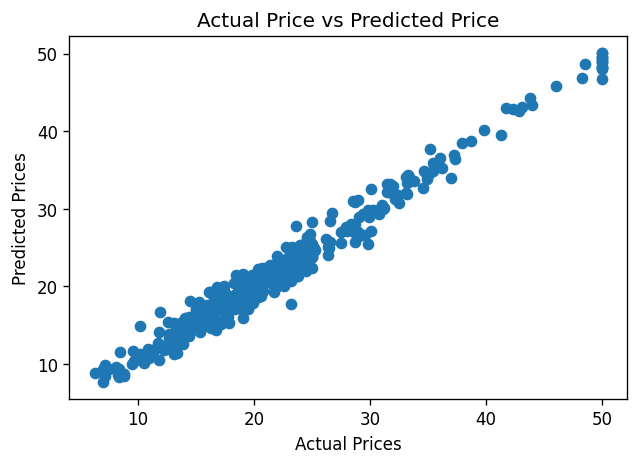

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction_xgboost = model.predict(x_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction_xgboost)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction_xgboost)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.907854603041394
Mean Absolute Error :  2.0834329997791965


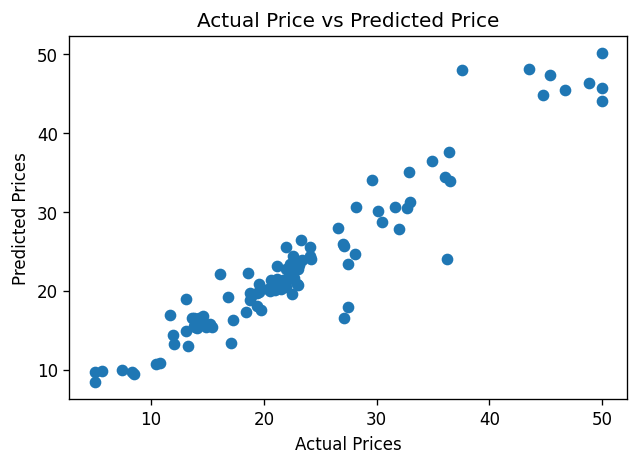

In [ ]:
plt.scatter(y_test, test_data_prediction_xgboost)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(x_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
y_pred=reg.predict(x_train)
print("The Score with ", (r2_score(y_train,y_pred)))

The Score with  0.29715266417176955


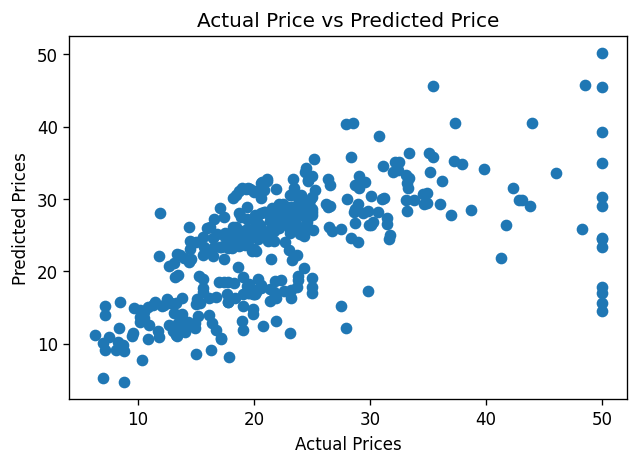

In [ ]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

def mlp_model(X, Y):

  estimator=MLPRegressor()


  param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
  }

  gsc = GridSearchCV(
      estimator,
      param_grid,
      cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

  grid_result = gsc.fit(X, Y)


  best_params = grid_result.best_params_

  best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                          activation =best_params["activation"],
                          solver=best_params["solver"],
                          max_iter= 5000, n_iter_no_change = 200
                )

  scoring = {
            'abs_error': 'neg_mean_absolute_error',
            'squared_error': 'neg_mean_squared_error',
            'r2':'r2'}

  scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)
  return best_params

In [ ]:
best_par=mlp_model(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [ -69.76371717 -165.70316855  -70.83851903 -110.04267395  -75.02263485
 -173.41072636  -68.75834418 -114.38116014  -69.13668872 -192.04623305
  -72.35629456 -143.9943628   -74.11917468 -204.75139257  -69.6334848
 -140.63693763  -69.20404539 -256.68720027  -72.56651899 -191.26508183
  -72.64127038 -246.68441143  -68.67870754 -174.6332054   -73.55329489
 -171.83881246  -72.26994202 -112.41647574  -70.26196467 -169.60478277
  -70.82479477 -110.67740295  -72.65248446 -188.56158097  -71.06866097
 -144.43113175  -72.7812176  -203.93079141  -75.9229017  -143.779248
  -74.25336311 -260.35375549  -69.3463833  -195.41455193  -73.15887927
 -260.88478524  -74.7990479  -180.21494534           nan  -45.19696179
           nan  -35.08924447           nan  -49.66977754           nan
  -39.52195417           nan  -47.63306096           nan  -41.68332876
           n

In [ ]:
best_par

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (120, 80, 40),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'adam'}

In [ ]:
reg = MLPRegressor(activation='tanh',alpha= 0.05,hidden_layer_sizes=(150, 100, 50),learning_rate='constant',max_iter=100,solver='adam').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import r2_score
y_pred_MLP=reg.predict(x_test)
print("The Score with ", (r2_score(y_test, y_pred_MLP)))

The Score with  -0.1459605495639391


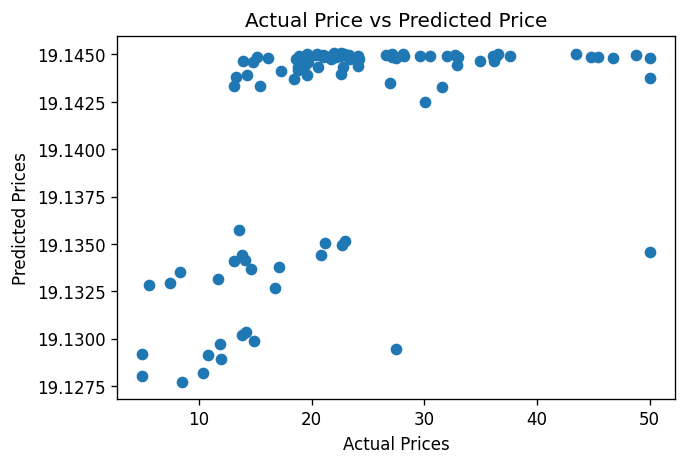

In [ ]:
plt.scatter(y_test,y_pred_MLP)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()